['/data0/dwei/Towerdata/MNY-2021-co2-76m-1-hour-20220321.csv', '/data0/dwei/Towerdata/MNY-2021-co2-50m-1-hour-20220321.csv']
['/data0/dwei/Towerdata/SNJ-2021-co2-42m-1-hour-20220321.csv', '/data0/dwei/Towerdata/SNJ-2021-co2-53m-1-hour-20220321.csv']
(8760, 13)
(8760, 13)


Text(0.5, 0, 'Stockholm 42 m')

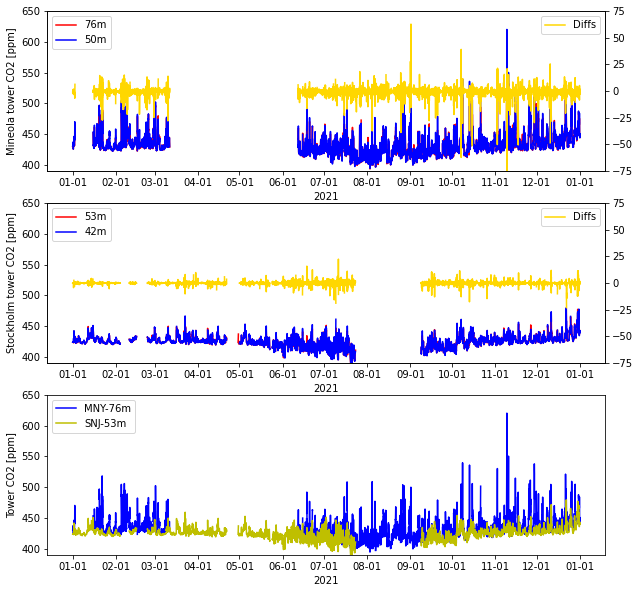

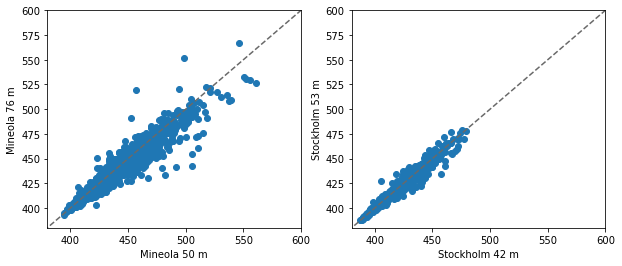

In [1]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
import pytz
from scipy.signal import savgol_filter

def utc_to_et(dt_utc):
    utc = pytz.timezone('UTC')
    est = pytz.timezone('US/Eastern')   
    outputfmt  = '%Y-%m-%d %H:%M:%S'
    dt_et = utc.localize(dt_utc).astimezone(est) 
    return dt_et

# Read all the tower CO2
print(glob('/data0/dwei/Towerdata/MNY-2021-co2*'))
print(glob('/data0/dwei/Towerdata/SNJ-2021-co2*'))
df_mny_76m = pd.read_csv('/data0/dwei/Towerdata/MNY-2021-co2-76m-1-hour-20220321.csv')
df_mny_50m = pd.read_csv('/data0/dwei/Towerdata/MNY-2021-co2-50m-1-hour-20220321.csv')
df_snj_42m = pd.read_csv('/data0/dwei/Towerdata/SNJ-2021-co2-42m-1-hour-20220321.csv')
df_snj_53m = pd.read_csv('/data0/dwei/Towerdata/SNJ-2021-co2-53m-1-hour-20220321.csv')
print(np.shape(df_mny_50m))
print(np.shape(df_snj_42m))

dt_str = df_mny_76m.iloc[:,0].to_numpy()   # UTC
dt_utc = np.array([dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in dt_str]) 
CO2_mny_76m = df_mny_76m.iloc[:,6].to_numpy()
CO2_mny_50m = df_mny_50m.iloc[:,6].to_numpy()
CO2_snj_42m = df_snj_42m.iloc[:,6].to_numpy()
CO2_snj_53m = df_snj_53m.iloc[:,6].to_numpy()

fig,ax=plt.subplots(3, figsize=(10,10))
Ylim = 650
ax[0].plot(dt_utc, CO2_mny_76m, color='r', label='76m')
ax[0].plot(dt_utc, CO2_mny_50m, color='b', label='50m')
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[0].legend(loc=2)
ax[0].set_ylabel('Mineola tower CO2 [ppm]')
ax[0].set_xlabel('2021')
ax[0].set_ylim(390, Ylim)

ax2=ax[0].twinx()
ax2.plot(dt_utc, CO2_mny_76m-CO2_mny_50m, label='Diffs', color='gold')
ax2.set_ylim(-75,75)
ax2.legend()

ax[1].plot(dt_utc, CO2_snj_53m, color='r', label='53m')
ax[1].plot(dt_utc, CO2_snj_42m, color='b', label='42m')
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[1].legend(loc=2)
ax[1].set_ylabel('Stockholm tower CO2 [ppm]')
ax[1].set_xlabel('2021')
ax[1].set_ylim(390, Ylim)

ax2=ax[1].twinx()
ax2.plot(dt_utc, CO2_snj_53m-CO2_snj_42m, label='Diffs', color='gold')
ax2.set_ylim(-75,75)
ax2.legend()

ax[2].plot(dt_utc, CO2_mny_50m, color='b', label='MNY-76m')
ax[2].plot(dt_utc, CO2_snj_53m, color='y', label='SNJ-53m')
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[2].legend(loc=2)
ax[2].set_ylabel('Tower CO2 [ppm]')
ax[2].set_xlabel('2021')
ax[2].set_ylim(390, Ylim)

fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(CO2_mny_50m, CO2_mny_76m)
ax[0].plot([0,600], [0,600],linestyle='--',color='dimgrey')
ax[0].set_ylim(380, 600)
ax[0].set_xlim(380, 600)
ax[0].set_ylabel('Mineola 76 m')
ax[0].set_xlabel('Mineola 50 m')

ax[1].scatter(CO2_snj_42m, CO2_snj_53m)
ax[1].plot([0,600], [0,600],linestyle='--',color='dimgrey')
ax[1].set_ylim(380, 600)
ax[1].set_xlim(380, 600)
ax[1].set_ylabel('Stockholm 53 m')
ax[1].set_xlabel('Stockholm 42 m')


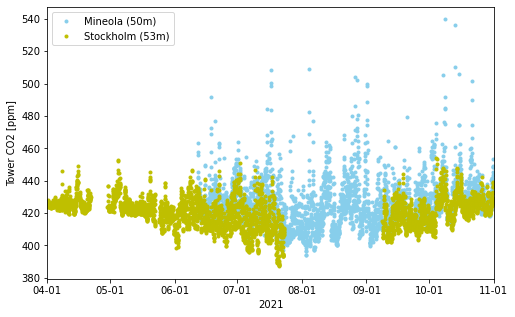

In [2]:
# Extract April-October CO2
# Use 53m for Stockholm and 50m for Mineola
FigDir = '/home/dwei/manuscripts/VPRM-sensitivity/fig/'
st_dt = dt.datetime(2021,4,1,0,0,0)
ed_dt = dt.datetime(2021,11,1,0,0,0)
boo_dt = np.logical_and(dt_utc>=st_dt, dt_utc<ed_dt)
dt_utc_sht = dt_utc[boo_dt]
CO2_mny = CO2_mny_50m[boo_dt]
CO2_snj = CO2_snj_53m[boo_dt]
CO2_snj_42m_apr_oct = CO2_snj_42m[boo_dt] # just for checking the vertical gradients

fig,ax=plt.subplots(1, figsize=(8,5))
ax.plot(dt_utc_sht, CO2_mny, color='skyblue', label='Mineola (50m)', marker='.',linestyle='')
ax.plot(dt_utc_sht, CO2_snj, color='y', label='Stockholm (53m)', marker='.',linestyle='')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax.legend()
ax.set_ylabel('Tower CO2 [ppm]')
ax.set_xlabel('2021')
ax.set_xlim(st_dt, ed_dt)
fig.savefig(FigDir+'Hourly_CO2_data')



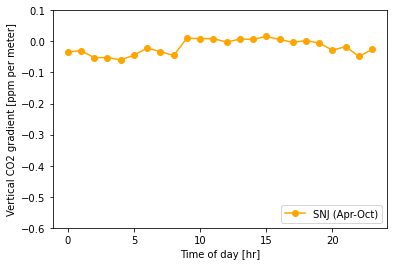

In [3]:
# The mean diurnal cycles of the vertical gradients
# To see the local biogenic influences (Large vertical gradient = local fluxes)
Diff_snj = (CO2_snj-CO2_snj_42m_apr_oct)/(53-42)
dt_et_sht = np.array([utc_to_et(d) for d in dt_utc_sht])
dt_et_sht_hrs = np.array([d.hour for d in dt_et_sht])

Diff_snj_ave = np.empty(24)
Diff_snj_ave[:] = np.nan
for hr in range(0,24):
    boo = dt_et_sht_hrs==hr
    Diff_snj_ave[hr] = np.nanmean(Diff_snj[boo])
    
fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(range(0,24), Diff_snj_ave, linestyle='-',marker='o', label='SNJ (Apr-Oct)',
       color='orange')
ax.set_ylim(-0.6, 0.1)
ax.set_ylabel('Vertical CO2 gradient [ppm per meter]')
ax.set_xlabel('Time of day [hr]') 
ax.legend(loc='lower right')


Raw SNJ CO2 have 1443 NaNs
2021-04-01  has 1 NaNs
Fixed the single NaN!!
2021-04-02  has 1 NaNs
Fixed the single NaN!!
2021-04-04  has 1 NaNs
Fixed the single NaN!!
2021-04-05  has 1 NaNs
Fixed the single NaN!!
2021-04-06  has 1 NaNs
Fixed the single NaN!!
2021-04-08  has 1 NaNs
Fixed the single NaN!!
2021-04-09  has 1 NaNs
Fixed the single NaN!!
2021-04-16  has 1 NaNs
Fixed the single NaN!!
2021-04-17  has 1 NaNs
Fixed the single NaN!!
2021-04-19  has 1 NaNs
Fixed the single NaN!!
2021-04-20  has 1 NaNs
Fixed the single NaN!!
2021-04-21  has 7 NaNs
2021-04-22  has 24 NaNs
2021-04-23  has 24 NaNs
2021-04-24  has 24 NaNs
2021-04-25  has 24 NaNs
2021-04-26  has 24 NaNs
2021-04-27  has 24 NaNs
2021-04-28  has 24 NaNs
2021-04-29  has 22 NaNs
2021-04-30  has 6 NaNs
2021-05-02  has 1 NaNs
Fixed the single NaN!!
2021-05-03  has 1 NaNs
Fixed the single NaN!!
2021-05-10  has 1 NaNs
Fixed the single NaN!!
2021-05-11  has 1 NaNs
Fixed the single NaN!!
2021-05-13  has 1 NaNs
Fixed the single NaN!!

/opt/sw/anaconda3/envs/GDAL+/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


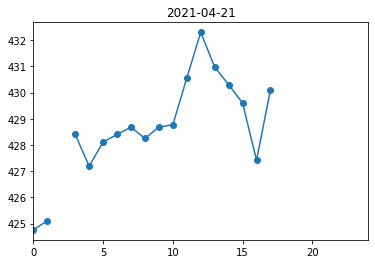

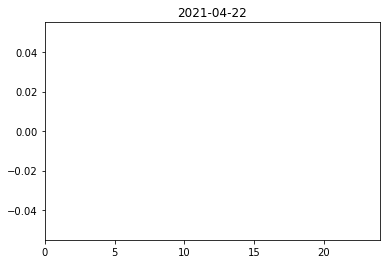

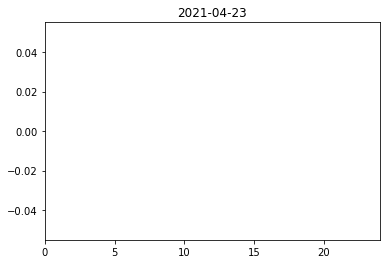

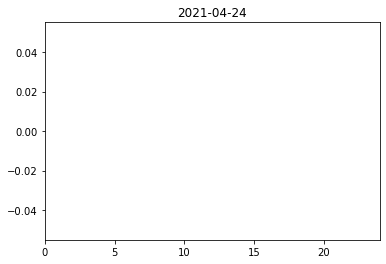

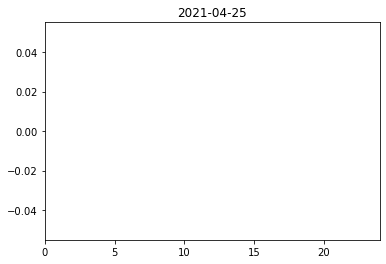

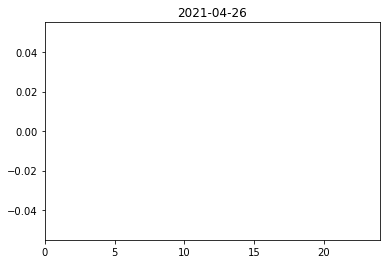

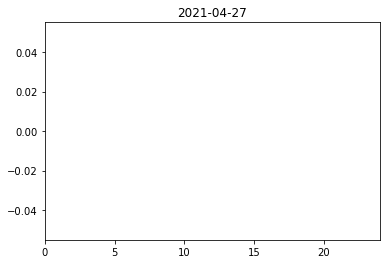

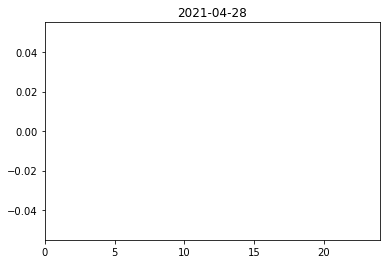

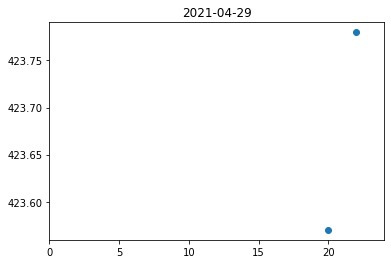

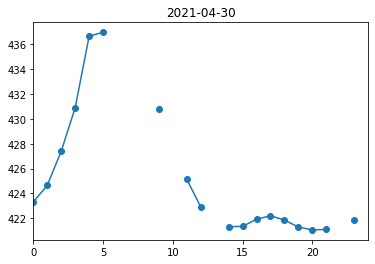

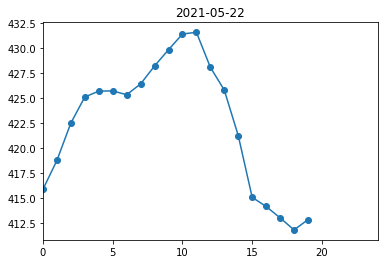

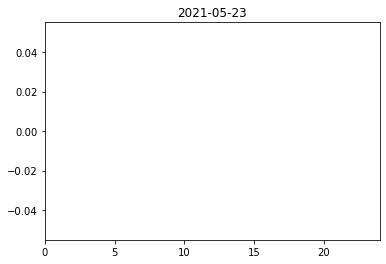

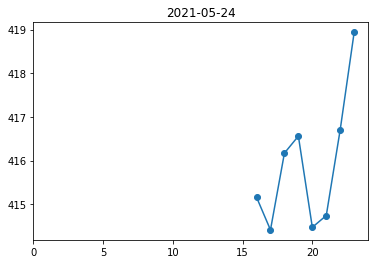

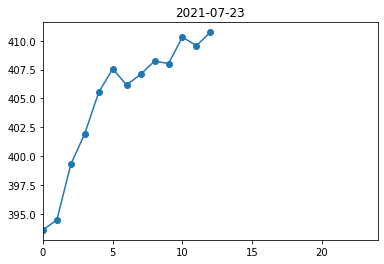

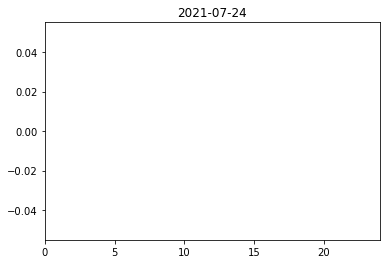

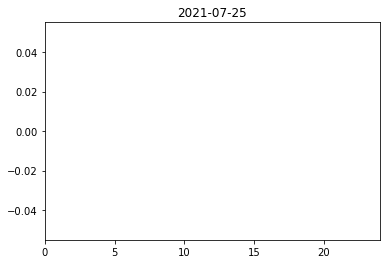

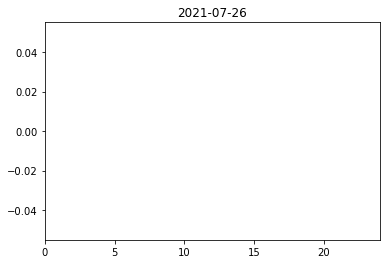

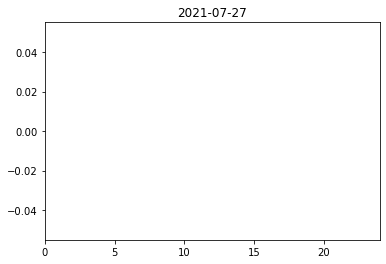

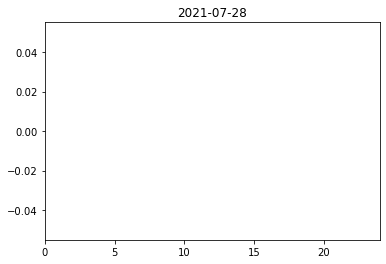

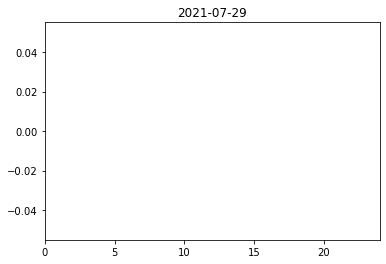

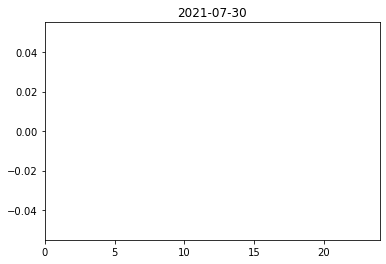

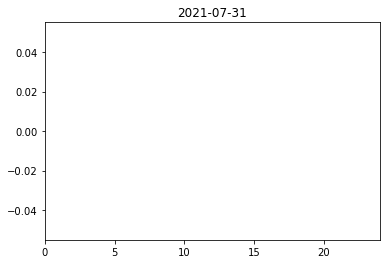

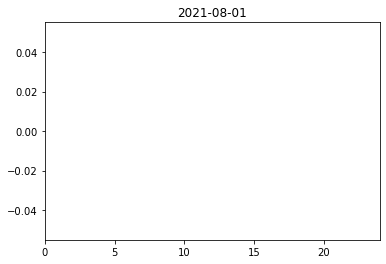

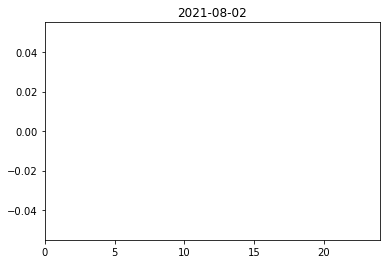

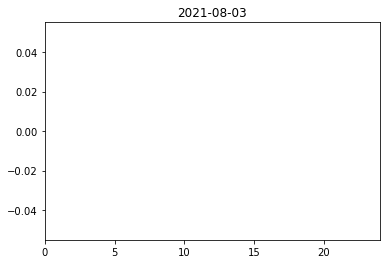

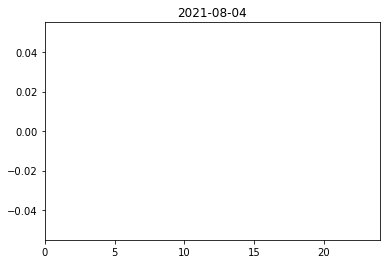

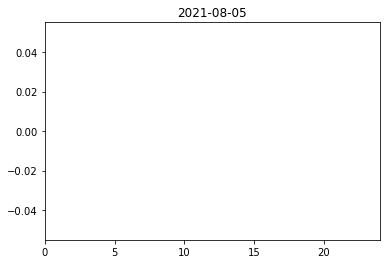

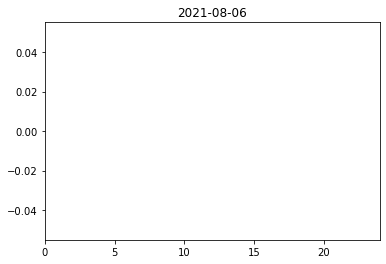

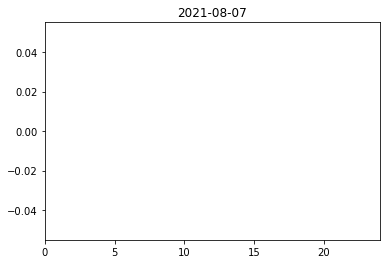

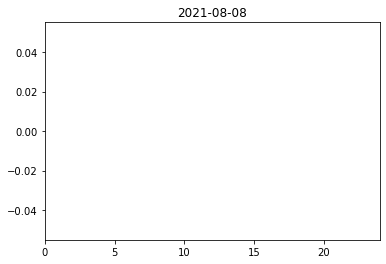

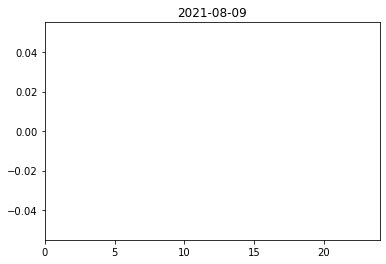

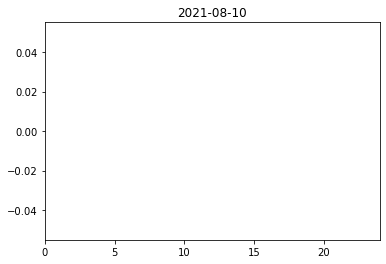

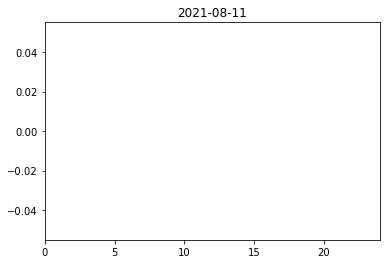

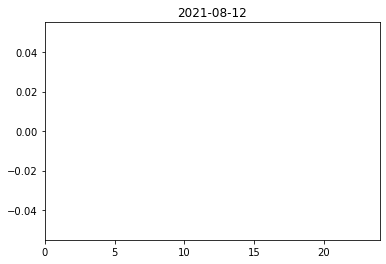

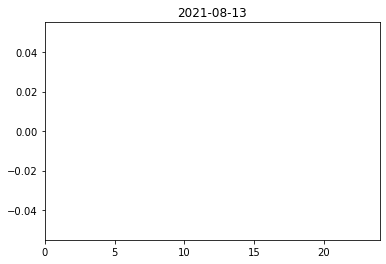

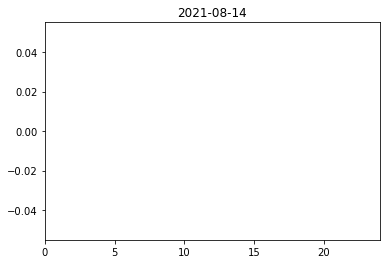

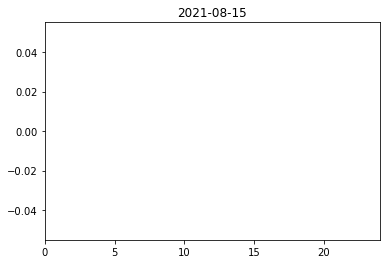

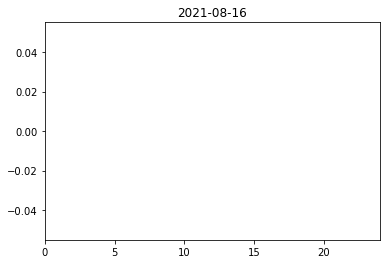

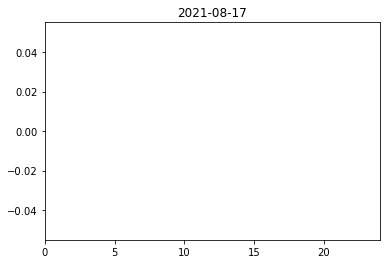

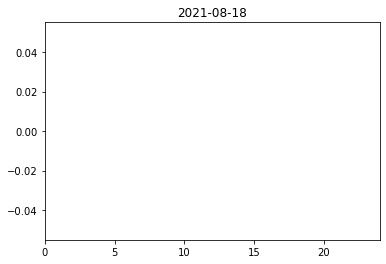

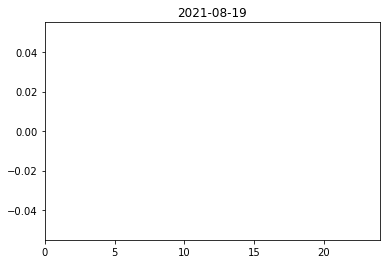

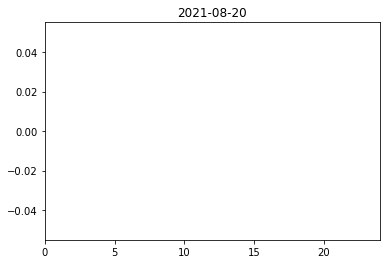

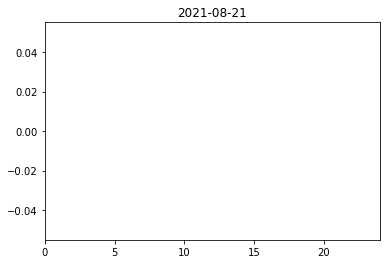

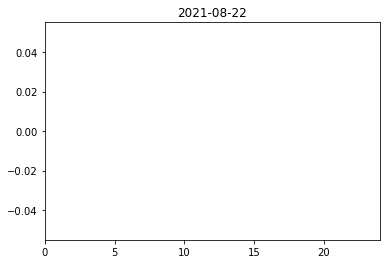

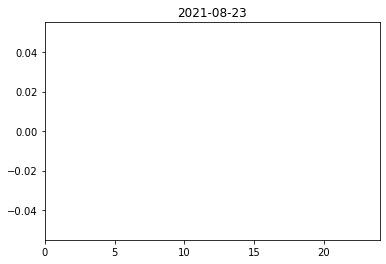

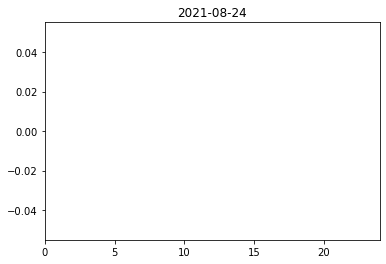

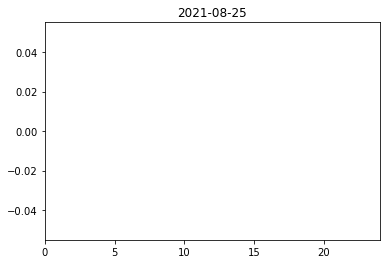

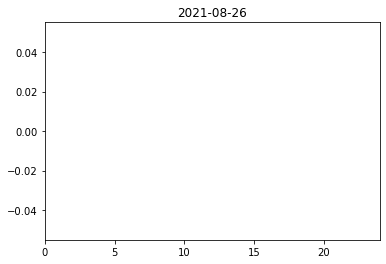

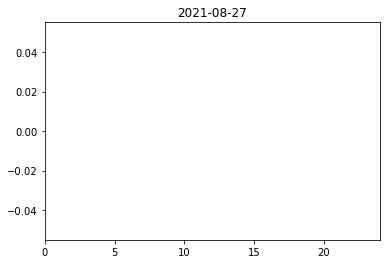

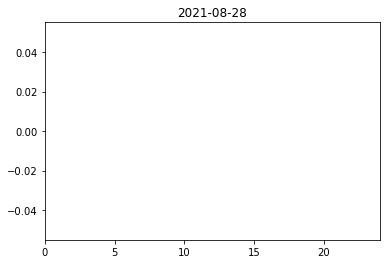

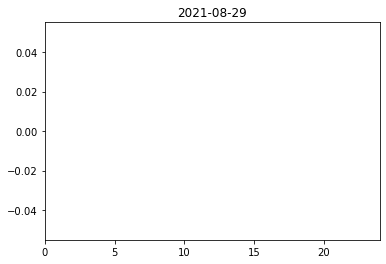

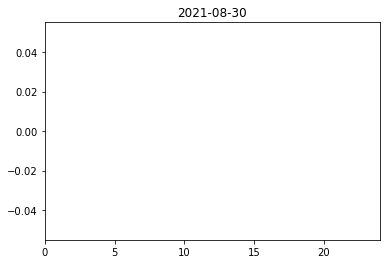

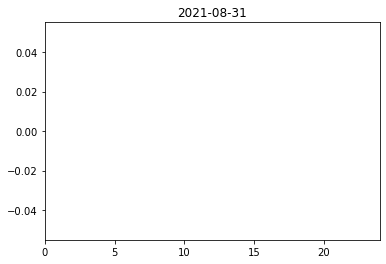

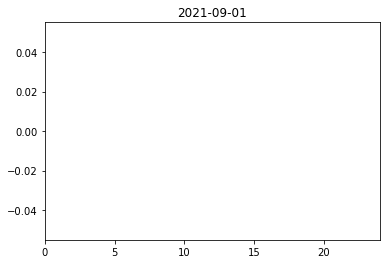

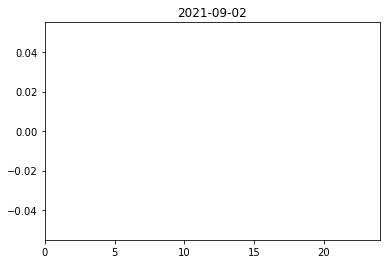

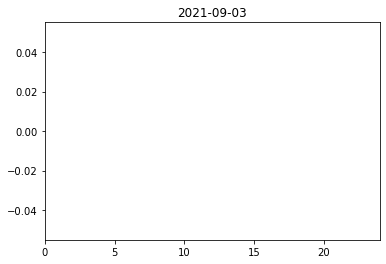

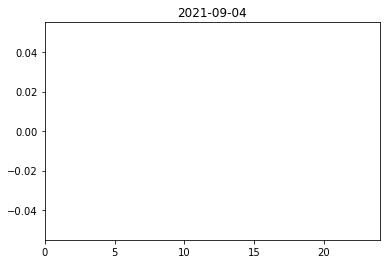

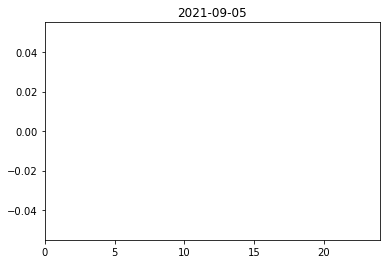

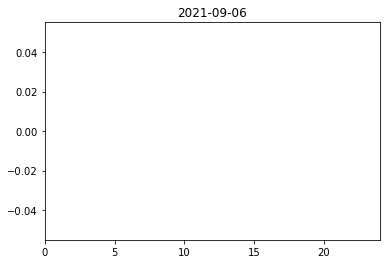

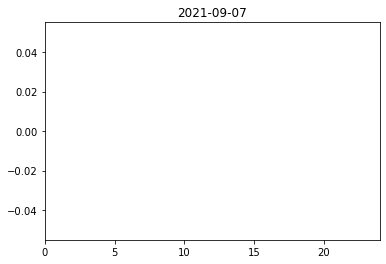

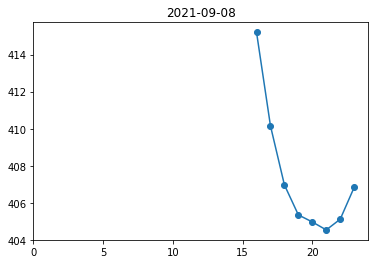

In [4]:
# Gap filling the Stockholm CO2
print('Raw SNJ CO2 have %d NaNs' %len(CO2_snj[np.isnan(CO2_snj)]) ) 
dt_dates_sht = np.array([d.date() for d in dt_utc_sht])

start_date=dt.date(2021,4,1)
end_date=dt.date(2021,11,1)
Dates = [start_date+dt.timedelta(days=x) for x in range(0, (end_date-start_date).days)]

dt_gap = []
for date in Dates:
    boo = dt_dates_sht==date
    CO2_day = CO2_snj[boo]
    if len(CO2_day[np.isnan(CO2_day)])!=0:
        print(date,' has '+str(len(CO2_day[np.isnan(CO2_day)])) + ' NaNs')
        
        # Fix the single NaN first
        if len(CO2_day[np.isnan(CO2_day)])==1: 
            ind_nan=np.where(np.isnan(CO2_day))[0]
            if ind_nan+1>23:
                CO2_tmp = CO2_snj[dt_dates_sht==date+dt.timedelta(days=1)]
                CO2_day[ind_nan] = (CO2_day[ind_nan-1]+CO2_tmp[0])/2.0   # next day
            else:
                CO2_day[ind_nan] = (CO2_day[ind_nan-1]+CO2_day[ind_nan+1])/2.0
            CO2_snj[boo]=CO2_day
            print('Fixed the single NaN!!')
            
        # Get the single NaN first
        if len(CO2_day[np.isnan(CO2_day)])>1: 
            dt_gap.append(date)

# Plot the dates of missing data            
for date in dt_gap:
    boo = dt_dates_sht==date
    dt_day=dt_utc_sht[boo]
    hours=np.array([d.hour for d in dt_day])
    CO2_day = CO2_snj[boo]

    plt.figure()
    plt.title(date)
    plt.plot(range(0,24), CO2_day, marker='o')
    plt.xlim(0,24)

    

/opt/sw/anaconda3/envs/GDAL+/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice


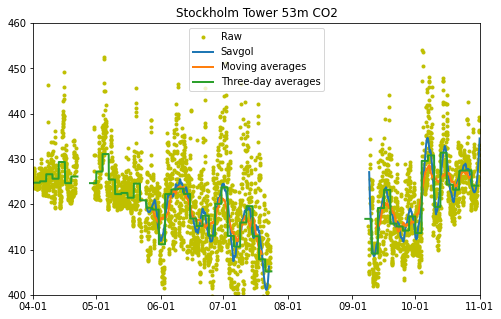

In [5]:
# Smoothing the Stockholm CO2 using three methods

# Days where data are available (yes) and otherwise (no) at Stockholm
# 4.01 - 4.20 (yes)
# 4.21 - 4.30 (no)
# 5.01 - 5.21 (yes)
# 5.22 - 5.24 (no)
# 5.25 - 7.22 (yes)
# 7.23 - 9.08 (no)
# 9.09 - 10.31 (yes)
span_pts = 7*24+1  # Should be odd number for Savgol-Golay filter
boo1 = np.logical_and(dt_dates_sht>=dt.date(2021,5,25), dt_dates_sht<=dt.date(2021,7,22))
boo2 = np.logical_and(dt_dates_sht>=dt.date(2021,9,9), dt_dates_sht<=dt.date(2021,10,31))

# Moving averages
def bin_smooth(var, bin_size):
    var_smooth=np.empty(np.size(var))
    var_smooth[:]=np.nan
    halfstep=int(bin_size//2.0)
    for ind in range(0,len(var_smooth)-halfstep):
        if ind>=halfstep:
            var_smooth[ind]=np.mean(var[ind-halfstep:ind+halfstep+1])
    return var_smooth

# Savgol-Golay filter
CO2_snj_sgf = np.empty(len(CO2_snj))
CO2_snj_sgf[:] = np.nan
CO2_snj_sgf[boo1] = savgol_filter(CO2_snj[boo1],span_pts,3)
CO2_snj_sgf[boo2] = savgol_filter(CO2_snj[boo2],span_pts,3)

# Moving averages
CO2_snj_ma = np.empty(len(CO2_snj))
CO2_snj_ma[:] = np.nan
CO2_snj_ma[boo1] = bin_smooth(CO2_snj[boo1],span_pts)
CO2_snj_ma[boo2] = bin_smooth(CO2_snj[boo2],span_pts)

# Three-day afternoon averages
dt_est_aware = np.array([utc_to_et(d) for d in dt_utc_sht]) # Convert dt_utc_sht to EST
hours_est = np.array([d.hour for d in dt_est_aware])
boo_aft_smth = np.logical_and(hours_est>11, hours_est<19)
Dates_est = np.array([d.date() for d in dt_est_aware])
start_date=dt.date(2021,4,1)
end_date=dt.date(2021,11,1)
Dates = np.array([start_date+dt.timedelta(days=x) for x 
                  in range(0,(end_date-start_date).days,3)])
CO2_snj_aft = np.empty(len(CO2_snj))
for date in Dates[0:-1]:
    boo_days = np.logical_and(Dates_est>=date, Dates_est<=date+dt.timedelta(days=2))
    boo = np.logical_and(boo_days,boo_aft_smth<19)
    CO2_ave_tmp = np.nanmean(CO2_snj[boo]) # the afternoon average
    CO2_snj_aft[boo_days] = np.ones(len(CO2_snj[boo]))*CO2_ave_tmp
CO2_snj_aft[CO2_snj_aft<1] = np.nan  

# Plot the three smoothing methods
fig, ax=plt.subplots(1,figsize=(8,5))
ax.set_title('Stockholm Tower 53m CO2')
ax.plot(dt_utc_sht, CO2_snj, label='Raw', marker='.', linestyle='',color='y')
ax.plot(dt_utc_sht, CO2_snj_sgf, label='Savgol',linewidth=2)
ax.plot(dt_utc_sht, CO2_snj_ma, label='Moving averages',linewidth=2)
ax.plot(dt_utc_sht, CO2_snj_aft, label='Three-day averages',linewidth=2)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax.set_xlim(start_date, end_date)
ax.set_ylim(400, 460)
ax.legend()
plt.show()
    

Raw MNY CO2 have 1856 NaNs
2021-04-01  has 24 NaNs
2021-04-04  has 24 NaNs
2021-04-07  has 24 NaNs
2021-04-10  has 24 NaNs
2021-04-13  has 24 NaNs
2021-04-16  has 24 NaNs
2021-04-19  has 24 NaNs
2021-04-22  has 24 NaNs
2021-04-25  has 24 NaNs
2021-04-28  has 24 NaNs
2021-05-01  has 24 NaNs
2021-05-04  has 24 NaNs
2021-05-07  has 24 NaNs
2021-05-10  has 24 NaNs
2021-05-13  has 24 NaNs
2021-05-16  has 24 NaNs
2021-05-19  has 24 NaNs
2021-05-22  has 24 NaNs
2021-05-25  has 24 NaNs
2021-05-28  has 24 NaNs
2021-05-31  has 24 NaNs
2021-06-03  has 24 NaNs
2021-06-06  has 24 NaNs
2021-06-09  has 24 NaNs
2021-06-12  has 1 NaNs
2021-06-15  has 1 NaNs
2021-06-18  has 1 NaNs
2021-06-21  has 1 NaNs
2021-06-24  has 1 NaNs
2021-06-30  has 1 NaNs
2021-07-03  has 1 NaNs
2021-07-06  has 1 NaNs
2021-07-09  has 1 NaNs
2021-07-15  has 1 NaNs
2021-07-18  has 1 NaNs
2021-07-21  has 1 NaNs
2021-07-24  has 1 NaNs
2021-07-27  has 1 NaNs
2021-07-30  has 1 NaNs
2021-08-02  has 1 NaNs
2021-08-05  has 1 NaNs
2021-0

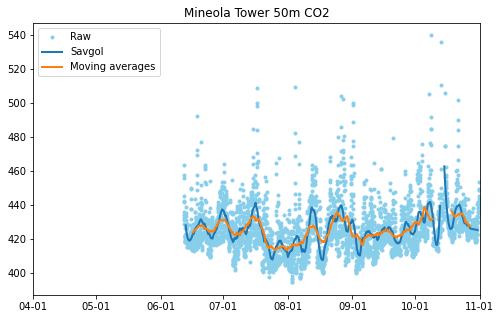

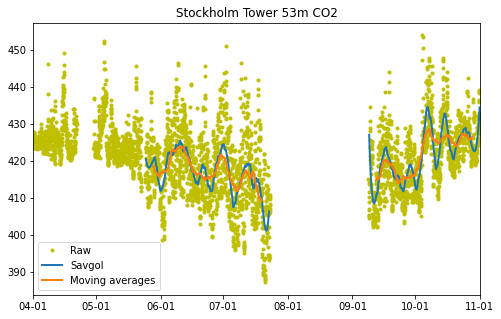

In [6]:
# Gap filling for Mineola tower
print('Raw MNY CO2 have %d NaNs' %len(CO2_mny[np.isnan(CO2_mny)]) ) 

dt_gap = []
for date in Dates:
    boo = dt_dates_sht==date
    CO2_day = CO2_mny[boo]
    if len(CO2_day[np.isnan(CO2_day)])!=0:
        print(date,' has '+str(len(CO2_day[np.isnan(CO2_day)])) + ' NaNs')
        
# Fix the single NaN 
ind=0
for x in CO2_mny:
    if np.isnan(x) and ~np.isnan(CO2_mny[ind-1]) and ~np.isnan(CO2_mny[ind+1]):
            CO2_mny[ind] = (CO2_mny[ind-1]+CO2_mny[ind+1])/2.0
            print('Fixed the single NaN!!')
            ind+=1
    else:
        ind+=1

# Days are gap-filled (yes) and otherwise (no) at Mineola
# 4.01 - 6.12 (no)
# 6.13 - 10.13 (yes)
# 10.14 (no)
# 10.15 - 10.31 (yes)
boo1   = np.logical_and(dt_dates_sht>=dt.date(2021,6, 13), dt_dates_sht<dt.date(2021,10,13))
boo2   = np.logical_and(dt_dates_sht>=dt.date(2021,10,15), dt_dates_sht<dt.date(2021,10,31))

# Savgol-Golay filter
CO2_mny_sgf = np.empty(len(CO2_mny))
CO2_mny_sgf[:] = np.nan
CO2_mny_sgf[boo1] = savgol_filter(CO2_mny[boo1],span_pts,3)
CO2_mny_sgf[boo2] = savgol_filter(CO2_mny[boo2],span_pts,3)

# Moving averages
CO2_mny_ma = np.empty(len(CO2_mny))
CO2_mny_ma[:] = np.nan
CO2_mny_ma[boo1] = bin_smooth(CO2_mny[boo1],span_pts)
CO2_mny_ma[boo2] = bin_smooth(CO2_mny[boo2],span_pts)

fig,ax=plt.subplots(1,figsize=(8,5))
ax.set_title('Mineola Tower 50m CO2')
ax.plot(dt_utc_sht, CO2_mny, label='Raw', marker='.', linestyle='',color='skyblue')
ax.plot(dt_utc_sht, CO2_mny_sgf, label='Savgol',linewidth=2)
ax.plot(dt_utc_sht, CO2_mny_ma, label='Moving averages',linewidth=2)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax.set_xlim(start_date, end_date)
ax.legend()
plt.show()

fig,ax=plt.subplots(1,figsize=(8,5))
ax.set_title('Stockholm Tower 53m CO2')
ax.plot(dt_utc_sht, CO2_snj, label='Raw', marker='.', linestyle='',color='y')
ax.plot(dt_utc_sht, CO2_snj_sgf, label='Savgol',linewidth=2)
ax.plot(dt_utc_sht, CO2_snj_ma, label='Moving averages',linewidth=2)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax.set_xlim(start_date, end_date)
ax.legend()
plt.show()


Text(0, 0.5, '$\\Delta$CO$_{2}$ [ppmv]')

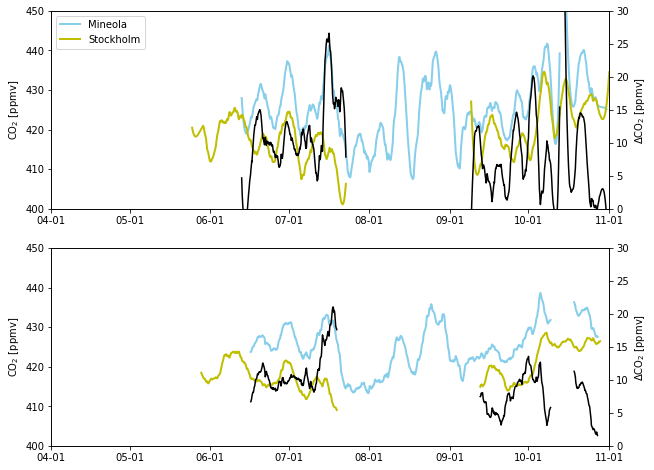

In [7]:
# Plot the smoothed CO2 at Stockholm and Mineola
fig,ax=plt.subplots(2,1, figsize=(10,8))
ax[0].plot(dt_utc_sht, CO2_mny_sgf, label='Mineola', color='skyblue',linewidth=2)
ax[0].plot(dt_utc_sht, CO2_snj_sgf, label='Stockholm',color='y',linewidth=2)
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[0].set_xlim(start_date, end_date)
ax[0].legend(loc=2)
ax[0].set_ylabel('CO$_{2}$ [ppmv]')
ax[0].set_ylim(400, 450)

ax2=ax[0].twinx()
ax2.plot(dt_utc_sht, CO2_mny_sgf-CO2_snj_sgf, color='k')
ax2.set_ylim(0, 30)
ax2.set_ylabel('$\Delta$CO$_{2}$ [ppmv]')

ax[1].plot(dt_utc_sht, CO2_mny_ma, label='Mineola',color='skyblue',linewidth=2)
ax[1].plot(dt_utc_sht, CO2_snj_ma, label='Stockholm',color='y',linewidth=2)
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[1].set_xlim(start_date, end_date)
ax[1].set_ylabel('CO$_{2}$ [ppmv]')
ax[1].set_ylim(400, 450)

ax2=ax[1].twinx()
ax2.plot(dt_utc_sht, CO2_mny_ma-CO2_snj_ma, color='k')
ax2.set_ylim(0, 30)
ax2.set_ylabel('$\Delta$CO$_{2}$ [ppmv]')


Text(0.5, 0, 'Hour [UTC]')

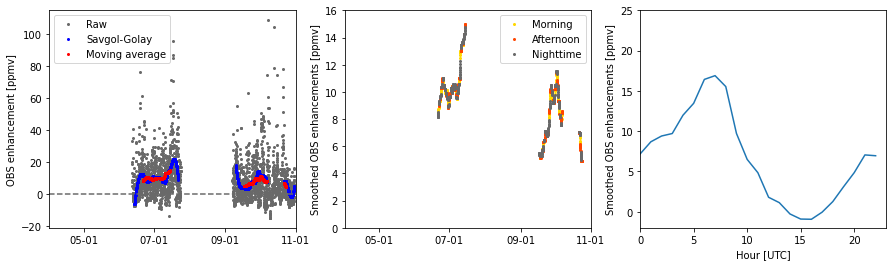

In [8]:
# Observed enhancements
OBS_en = CO2_mny-CO2_snj_aft
Hours_obs = np.array([d.hour for d in dt_utc_sht]) #UTC
Hours_et = Hours_obs-4 #EST
i = 0
for h in Hours_et:
    if h<0:
        Hours_et[i] = h+24
    i+=1

# local hour constraint
sr_hr = 6+4  #sunrise
ss_hr = 19+4 #sunset 
nn_hr = 11+4 #noon
boo_mor = np.logical_and(Hours_obs>=sr_hr,Hours_obs<=nn_hr)
boo_aft = np.logical_and(Hours_obs>nn_hr,Hours_obs<=ss_hr)
boo_nig = np.logical_or(Hours_obs<sr_hr,Hours_obs>ss_hr)

# Smooth the observed enhancements
# 6,13-7,22
# 9.09-10.31
span_pts = 24*14+1
boo1   = np.logical_and(dt_dates_sht>dt.date(2021,6,13), dt_dates_sht<dt.date(2021,7,22))
boo2   = np.logical_and(dt_dates_sht>dt.date(2021,9,9), dt_dates_sht<dt.date(2021,10,31))
# Savgol-Golay filter
OBS_en_sgf = np.empty(len(OBS_en))
OBS_en_sgf[:] = np.nan
OBS_en_sgf[boo1] = savgol_filter(OBS_en[boo1],span_pts,3)
OBS_en_sgf[boo2] = savgol_filter(OBS_en[boo2],span_pts,3)

# Moving averages
OBS_en_ma = np.empty(len(OBS_en))
OBS_en_ma[:] = np.nan
OBS_en_ma[boo1] = bin_smooth(OBS_en[boo1],span_pts)
OBS_en_ma[boo2] = bin_smooth(OBS_en[boo2],span_pts)

# Plot
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].plot(dt_utc_sht, OBS_en, color='dimgrey',linestyle='',marker='.',label='Raw',markersize=4)
ax[0].plot(dt_utc_sht, OBS_en_sgf, color='b',linestyle='',marker='.',label='Savgol-Golay',markersize=4)
ax[0].plot(dt_utc_sht, OBS_en_ma, color='r',linestyle='',marker='.',label='Moving average',markersize=4)
ax[0].axhline(y=0,color='dimgrey',linestyle='--')
ax[0].set_ylabel('OBS enhancement [ppmv]')
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax[0].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[0].set_xlim(start_date, end_date)
ax[0].legend(loc=2)       

ax[1].plot(dt_utc_sht[boo_mor], OBS_en_ma[boo_mor], color='gold',linestyle='',marker='.',
           label='Morning',markersize=4)
ax[1].plot(dt_utc_sht[boo_aft], OBS_en_ma[boo_aft], color='orangered',linestyle='',marker='.',
           label='Afternoon',markersize=4)
ax[1].plot(dt_utc_sht[boo_nig], OBS_en_ma[boo_nig], color='dimgrey',linestyle='',marker='.',
           label='Nighttime',markersize=4)
ax[1].set_ylim(0, 16)
ax[1].set_ylabel('Smoothed OBS enhancements [ppmv]')
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax[1].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[1].set_xlim(start_date, end_date)
ax[1].legend()

# Averages
OBSen_ave_hr =[]
OBSen_std_hr=[]
for hr in range(0,23):
    OBSen_ave_hr.append(np.nanmedian(OBS_en[Hours_et==hr]))
    OBSen_std_hr.append(np.nanstd(OBS_en[Hours_et==hr]))
ax[2].plot(range(0,23), OBSen_ave_hr) #, yerr=OBSen_std_hr)
ax[2].set_ylim(-2, 25)
ax[2].set_xlim(0, 23)
ax[2].set_ylabel('Smoothed OBS enhancements [ppmv]')
ax[2].set_xlabel('Hour [UTC]')


In [30]:
#EDGAR sectors:
#AGS, agricultural soils
#CHE, chemical processes
#ENE, power industry
#FFF, fossil fuel fires
#IND, combustion for manufacturing
#IRO, iron and steel production
#NEU, non energy use of fuels
#NFE, non-ferrous metals production
#NMM, non-metallic minerals production
#PRO, fuel exploitation
#PRU_SOL, solvents and products use
#RCO, energy for buildings
#REF_TRF, oil refineries and transformation industry
#SWD_INC, solid waste incineration
#TNR_Aviation_CDS, aviation climbing and descent
#TNR_Aviation_CRS, aviation cruise
#TNR_Aviation_LTO, aviation landing and takeoff
#TNR_Other, railways, pipelines, off-road transport
#TNR_Ship, shipping
#TRO_noRES, road transportation

# Read Lukes footprints
file_dbf='MNY_HRRR_EDGAR_DEVasFOR_VPRM_CO2_convolved_all.csv'
file_grs='MNY_HRRR_EDGAR_DEVasGRS_VPRM_CO2_convolved_all.csv'
# file_dbf2= 'MNY_HRRR_EDGAR_DEVasFOR_VPRM_CO2_convolved_all.csv'
# file_grs2='MNY_HRRR_EDGAR_DEVasGRS_VPRM_CO2_convolved_all.csv'
# DEVasDBF
df_fp = pd.read_csv('/data0/dwei/Towerdata/'+file_dbf)
dt_str=df_fp.iloc[:, 0].to_numpy()
Sectors = df_fp.iloc[:, 1:21].to_numpy()
NEE_dbf_en = df_fp.iloc[:, 21].to_numpy()
GEE_dbf_en = df_fp.iloc[:, 22].to_numpy()
Res_dbf_en = df_fp.iloc[:, 23].to_numpy()
fp_tot = df_fp.iloc[:, 24].to_numpy()
fp_vprm = df_fp.iloc[:, 25].to_numpy()
fp_frac = df_fp.iloc[:, 26].to_numpy()
EDGAR_en = df_fp.iloc[:, 27].to_numpy()
# Datetime format
dt_fp=np.array([dt.datetime.strptime(d, '%m/%d/%y %H:%M') for d in dt_str])
dt_fp_et=np.array([utc_to_et(d) for d in dt_fp])
Hours=np.array([d.hour for d in dt_fp])
Hours_et =np.array([d.hour for d in dt_fp_et])
Months=np.array([d.month for d in dt_fp]) 
# DEVasGRS
df_fp = pd.read_csv('/data0/dwei/Towerdata/'+file_grs)
NEE_grs_en = df_fp.iloc[:, 21].to_numpy()
GEE_grs_en = df_fp.iloc[:, 22].to_numpy()
Res_grs_en = df_fp.iloc[:, 23].to_numpy()

# footprint constraint
fp_fra_crit = 0.5
fp_tot_crit_mor = 1.1
fp_tot_crit_aft = 0.7
fp_tot_crit_nig = 1.5
boo_fp_fra = fp_frac>fp_fra_crit
boo_fp_tot_mor = fp_tot>fp_tot_crit_mor
boo_fp_tot_aft = fp_tot>fp_tot_crit_aft
boo_fp_tot_nig = fp_tot>fp_tot_crit_nig
boo_fp_mor = np.logical_and(boo_fp_fra,boo_fp_tot_mor)
boo_fp_aft = np.logical_and(boo_fp_fra,boo_fp_tot_aft)
boo_fp_nig = np.logical_and(boo_fp_fra,boo_fp_tot_nig)

# local hour constraint
sr_hr = 8  #sunrise
ss_hr = 19 #sunset 
nn_hr = 11 #noon
boo_mor = np.logical_and(Hours_et>=sr_hr,Hours_et<=nn_hr)
boo_aft = np.logical_and(Hours_et>nn_hr,Hours_et<=ss_hr)
boo_nig = np.logical_or(Hours_et<sr_hr,Hours_et>ss_hr)
boo_mor2 = np.logical_and(boo_fp_mor,boo_mor)
boo_aft2 = np.logical_and(boo_fp_aft,boo_aft)
boo_nig2 = np.logical_and(boo_fp_nig,boo_nig)
boo_aft2_gs = np.logical_and(boo_aft2,Months<9)# growing season Jun-Aug
boo_mor2_gs = np.logical_and(boo_mor2,Months<9)# growing season Jun-Aug
boo_nig2_gs = np.logical_and(boo_nig2,Months<9)# growing season Jun-Aug

# Diurnal cycles of all modeled data
NEE_ave_hr_dbf = []
NEE_ave_hr_grs = []
NEE_std_hr_grs = []

EDGAR_ave_hr =[]
EDGAR_std_hr =[]

Sector_ave_hr = np.empty((24,20)) #hours, sectors
Sector_ave_hr[:,:]=np.nan   

for hr in range(0,24):
    tst_orig = Hours_et==hr
    tst_modi = np.logical_and(boo_fp_fra,Hours_et==hr)
    # total EDGAR
    EDGAR_ave_hr.append(np.nanmean(EDGAR_en[tst_orig]))
    EDGAR_std_hr.append(np.nanstd(EDGAR_en[tst_orig]))
    
    # VPRM
    NEE_ave_hr_dbf.append(np.nanmean(NEE_dbf_en[tst_orig]))
    NEE_ave_hr_grs.append(np.nanmean(NEE_grs_en[tst_orig]))
    NEE_std_hr_grs.append(np.nanstd(NEE_grs_en[tst_orig]))
    
    # Sectors
    Sector_ave_hr[hr,:] = np.nanmean(Sectors[tst_orig,:],axis=0)


The median and mean of the total are 1.122329, 1.366645
The median of the total in the mornings are 1.060752, 1.276464
The median of the total in the afternoons are 0.677162, 0.842652
The median of the total at night are 1.509144, 1.746035


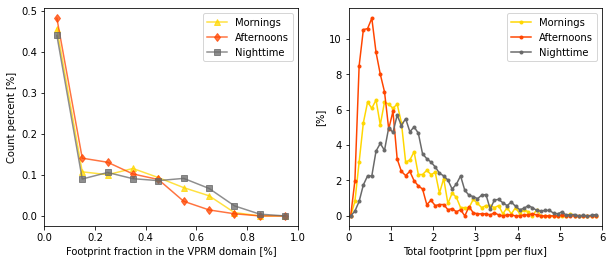

In [10]:
# The total and fractional footprints
fp_frac_mor = fp_frac[boo_mor]
fp_frac_aft = fp_frac[boo_aft]
fp_frac_nig = fp_frac[boo_nig]

fp_tot_mor = fp_tot[boo_mor]
fp_tot_aft = fp_tot[boo_aft]
fp_tot_nig = fp_tot[boo_nig]

bin_width = 0.1
xaxis_frac = np.arange(bin_width/2.0, 1.0, bin_width)
fp_hist, fp_bin = np.histogram(fp_frac, bins=np.arange(0, 1+bin_width, bin_width))
frac_mor_hist, frac_mor_bin = np.histogram(fp_frac_mor, bins=np.arange(0, 1+bin_width, bin_width))
frac_aft_hist, frac_aft_bin = np.histogram(fp_frac_aft, bins=np.arange(0, 1+bin_width, bin_width))
frac_nig_hist, frac_nig_bin = np.histogram(fp_frac_nig, bins=np.arange(0, 1+bin_width, bin_width))

xaxis_tot = np.arange(bin_width/2.0, 6.0-bin_width, bin_width)
fptot_hist, fptot_bin = np.histogram(fp_tot, bins=np.arange(0, 6.0, bin_width))
fptot_hist_mor, fptot_bin_mor = np.histogram(fp_tot_mor, bins=np.arange(0, 6.0, bin_width))
fptot_hist_aft, fptot_bin_aft = np.histogram(fp_tot_aft, bins=np.arange(0, 6.0, bin_width))
fptot_hist_nig, fptot_bin_nig = np.histogram(fp_tot_nig, bins=np.arange(0, 6.0, bin_width))

fig, ax=plt.subplots(1,2,figsize=(10, 4))
# ax[0].plot(xaxis_frac, fp_hist/np.size(fp_frac), color='k', label='All', marker='o', linestyle='-')
ax[0].plot(xaxis_frac, frac_mor_hist/np.size(fp_frac_mor), color='gold', 
        alpha=0.75, label='Mornings', marker='^', linestyle='-')
ax[0].plot(xaxis_frac, frac_aft_hist/np.size(fp_frac_aft), color='orangered', 
        alpha=0.75, label='Afternoons', marker='d', linestyle='-')
ax[0].plot(xaxis_frac, frac_nig_hist/np.size(fp_frac_nig), color='dimgrey', 
        alpha=0.75, label='Nighttime', marker='s', linestyle='-')
ax[0].set_xlim(0, 1.0)
ax[0].set_xlabel('Footprint fraction in the VPRM domain [%]')
ax[0].set_ylabel('Count percent [%]')
ax[0].legend()

# ax[1].plot(xaxis, fptot_hist/np.size(fp_tot)*100.0, color='k', alpha=1, label='All', marker='.', linestyle='-')
ax[1].plot(xaxis_tot, fptot_hist_mor/np.size(fp_tot_mor)*100.0, color='gold', alpha=1, label='Mornings', marker='.', linestyle='-')
ax[1].plot(xaxis_tot, fptot_hist_aft/np.size(fp_tot_aft)*100.0, color='orangered', alpha=1, label='Afternoons', marker='.', linestyle='-')
ax[1].plot(xaxis_tot, fptot_hist_nig/np.size(fp_tot_nig)*100.0, color='dimgrey', alpha=1, label='Nighttime', marker='.', linestyle='-')
ax[1].set_xlim(0, 6.0)
ax[1].set_xlabel('Total footprint [ppm per flux]')
ax[1].set_ylabel('[%]')
ax[1].legend()

print('The median and mean of the total are %f, %f' %(np.nanmedian(fp_tot),np.nanmean(fp_tot)))
print('The median of the total in the mornings are %f, %f' %(np.nanmedian(fp_tot_mor),np.nanmean(fp_tot_mor)))
print('The median of the total in the afternoons are %f, %f' %(np.nanmedian(fp_tot_aft),np.nanmean(fp_tot_aft)))
print('The median of the total at night are %f, %f' %(np.nanmedian(fp_tot_nig),np.nanmean(fp_tot_nig)))


0.0
(5136,)


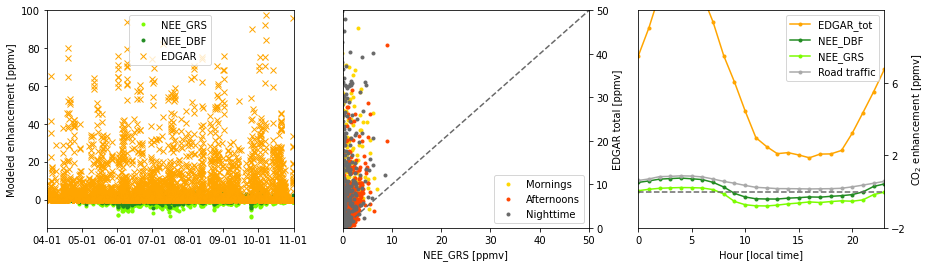

In [11]:
print(np.nanmedian(NEE_dbf_en))
print(np.shape(dt_fp))
fig,ax=plt.subplots(1,3, figsize=(15, 4))

# ax2=ax[0].twinx()
# ax2.plot(dt_fp, abs(np.divide(NEE_dbf_en,EDGAR_en)), label='footprint fraction', color='grey', alpha=0.5,
#         marker='.',linestyle='')
# ax2.set_ylim(0, 1.0)
# ax2.set_ylabel('$\dfrac{VPRM}{EDGAR}$')

ax[0].plot(dt_fp, NEE_grs_en, label='NEE_GRS', color='lawngreen',linestyle='',marker='.')
ax[0].plot(dt_fp, NEE_dbf_en, label='NEE_DBF', color='forestgreen',linestyle='',marker='.')
# ax[0].plot(dt_fp, Traffic_en, label='TRO_noRES', color='orange',linestyle='',marker='x')
ax[0].plot(dt_fp, EDGAR_en, label='EDGAR', color='orange',linestyle='',marker='x')

ax[0].set_ylabel('Modeled enhancement [ppmv]')
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[0].set_xlim(start_date, end_date)
ax[0].set_ylim(-15, 100)
ax[0].legend()

# Scatter plot comparison
ax[1].scatter(-NEE_grs_en[boo_mor], EDGAR_en[boo_mor],marker='.',label='Mornings',color='gold')
ax[1].scatter(-NEE_grs_en[boo_aft], EDGAR_en[boo_aft],marker='.',label='Afternoons',color='orangered')
ax[1].scatter(-NEE_grs_en[boo_nig], EDGAR_en[boo_nig],marker='.',label='Nighttime',color='dimgrey')

ax[1].plot([0,50],[0,50], color='dimgrey',linestyle='--')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel('EDGAR total [ppmv]')
ax[1].set_xlabel('NEE_GRS [ppmv]')
ax[1].set_xlim(0, 50)
ax[1].set_ylim(0, 50)
ax[1].legend(loc=4)

# Mean diurnal cycles
ax[2].plot(range(0,24), EDGAR_ave_hr, label='EDGAR_tot', color='orange',marker='.')
ax[2].plot(range(0,24), NEE_ave_hr_dbf, label='NEE_DBF', color='forestgreen',marker='.')
ax[2].plot(range(0,24), NEE_ave_hr_grs, label='NEE_GRS', color='lawngreen',marker='.')
ax[2].plot(range(0,24), Sector_ave_hr[:,-1], label='Road traffic', color='darkgrey',marker='.')

ax[2].axhline(y=0, color='dimgrey',linestyle='--')
ax[2].yaxis.set_label_position("right")
ax[2].yaxis.tick_right()
ax[2].set_ylabel('CO$_{2}$ enhancement [ppmv]')
ax[2].set_xlabel('Hour [local time]')
ax[2].set_xlim(0, 23)
ax[2].set_ylim(-2, 10)
ax[2].set_yticks(np.arange(-2, 10, 4))
ax[2].legend()


Text(0, 0.5, 'NEE_FOR + EDGAR')

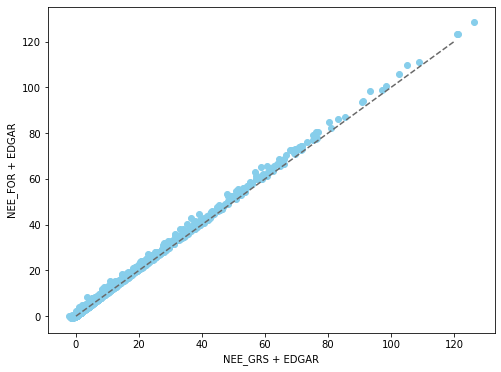

In [12]:
# NEE_GRS and NEE_DBF for EDGAR_en
fig, ax=plt.subplots(1,figsize=(8,6))
ax.scatter(NEE_grs_en+EDGAR_en,NEE_dbf_en+EDGAR_en, marker='o', 
              color='skyblue',label='Mornings')
ax.plot([0,120], [0,120], color='dimgrey', linestyle='--')

ax.set_xlabel('NEE_GRS + EDGAR')
ax.set_ylabel('NEE_FOR + EDGAR')


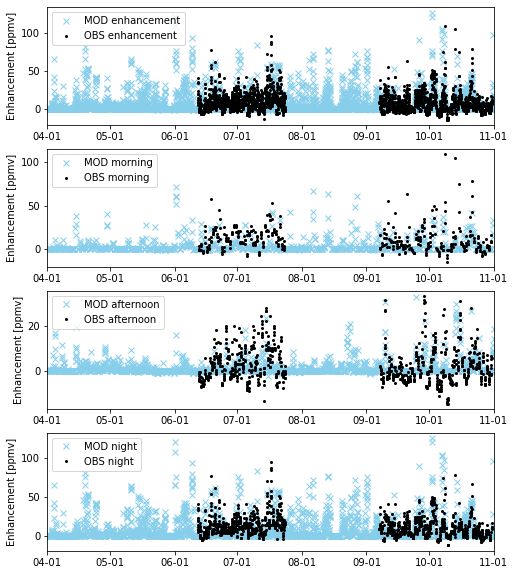

In [13]:
# Comparison with observations for all footprings
fig,ax=plt.subplots(4, figsize=(8,10))
ax[0].plot(dt_fp, NEE_grs_en+EDGAR_en, color='skyblue',linestyle='',
        marker='x',label='MOD enhancement',markerfacecolor='w')
ax[0].plot(dt_fp, OBS_en, color='k',linestyle='',marker='.',label='OBS enhancement',markersize=4)

ax[0].set_ylabel('Enhancement [ppmv]')
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[0].set_xlim(start_date, end_date)
ax[0].legend(loc=2)

# mornings
ax[1].plot(dt_fp[boo_mor], NEE_grs_en[boo_mor]+EDGAR_en[boo_mor], color='skyblue',linestyle='',
        marker='x',label='MOD morning',markerfacecolor='w')
ax[1].plot(dt_fp[boo_mor], OBS_en[boo_mor], color='k',linestyle='',marker='.',
           label='OBS morning',markersize=4)

ax[1].set_ylabel('Enhancement [ppmv]')
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[1].set_xlim(start_date, end_date)
ax[1].legend(loc=2)

# afternoons
ax[2].plot(dt_fp[boo_aft], NEE_grs_en[boo_aft]+EDGAR_en[boo_aft], color='skyblue',linestyle='',
        marker='x',label='MOD afternoon',markerfacecolor='w')
ax[2].plot(dt_fp[boo_aft], OBS_en[boo_aft], color='k',linestyle='',marker='.',
           label='OBS afternoon',markersize=4)

ax[2].set_ylabel('Enhancement [ppmv]')
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[2].set_xlim(start_date, end_date)
ax[2].legend(loc=2)

# nighttime
ax[3].plot(dt_fp[boo_nig], NEE_grs_en[boo_nig]+EDGAR_en[boo_nig], color='skyblue',linestyle='',
        marker='x',label='MOD night',markerfacecolor='w')
ax[3].plot(dt_fp[boo_nig], OBS_en[boo_nig], color='k',linestyle='',marker='.',
           label='OBS night',markersize=4)

ax[3].set_ylabel('Enhancement [ppmv]')
ax[3].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[3].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[3].set_xlim(start_date, end_date)
ax[3].legend(loc=2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


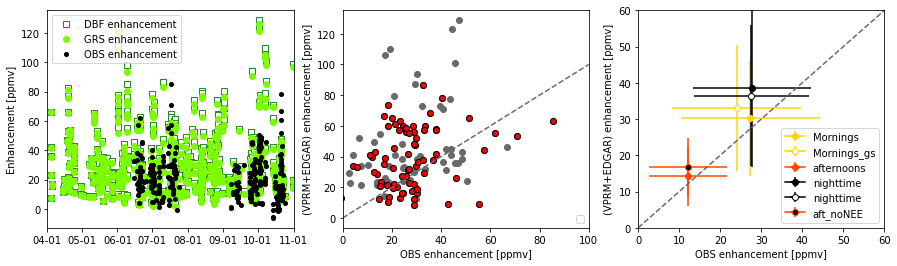

In [46]:
# footprint constraints
# fp_fra_crit = 0.5
# fp_tot_crit = 1.3
# boo_fp_fra = fp_frac>fp_fra_crit
# boo_fp_tot = fp_tot>fp_tot_crit
# boo_fp = np.logical_and(boo_fp_fra,boo_fp_tot)

# # local hour constraint
# boo_mor2 = np.logical_and(boo_fp,boo_mor)
# boo_aft2 = np.logical_and(boo_fp,boo_aft)
# boo_nig2 = np.logical_and(boo_fp,boo_nig)

fig,ax=plt.subplots(1, 3, figsize=(15, 4))
NEE_plt = NEE_grs_en
# Timeseries comparison
ax[0].plot(dt_fp[boo_fp_aft], NEE_dbf_en[boo_fp_aft]+EDGAR_en[boo_fp_aft], color='forestgreen',linestyle='',
        marker='s',label='DBF enhancement', markerfacecolor='w')
ax[0].plot(dt_fp[boo_fp_aft], NEE_grs_en[boo_fp_aft]+EDGAR_en[boo_fp_aft], color='lawngreen',linestyle='',
        marker='o',label='GRS enhancement')
ax[0].plot(dt_fp[boo_fp_aft], OBS_en[boo_fp_aft], color='k',linestyle='',marker='o',label='OBS enhancement',markersize=4)

# ax[0].plot(dt_fp[boo_fp], VPRM_en[boo_fp]+EDGAR_en[boo_fp], color='skyblue',linestyle='',
#         marker='x')
# ax[0].plot(dt_fp[boo_fp], OBS_en[boo_fp], color='k',linestyle='',
#            marker='o',markerfacecolor='w')

ax[0].set_ylabel('Enhancement [ppmv]')
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax[0].set_xlim(start_date, end_date)
ax[0].legend(loc=0)

# Hourly data points comparison
# # # DBF
# ax[1].scatter(OBS_en[boo_mor2],NEE_dbf_en[boo_mor2]+EDGAR_en[boo_mor2], marker='s', 
#               color='gold',label='Mornings',facecolor='w')
# ax[1].scatter(OBS_en[boo_aft2],NEE_dbf_en[boo_aft2]+EDGAR_en[boo_aft2], marker='s', 
#               color='orangered',label='afternoons', facecolor='w')
# ax[1].scatter(OBS_en[boo_nig2],NEE_dbf_en[boo_nig2]+EDGAR_en[boo_nig2], marker='s',
#               color='dimgrey',label='nighttime',facecolor='w') #+EDGAR_en[boo_nig]

# ax[1].scatter(OBS_en[boo_mor2],NEE_dbf_en[boo_mor2]+EDGAR_en[boo_mor2], marker='o', 
#               color='gold')
# ax[1].scatter(OBS_en[boo_mor2_gs],NEE_dbf_en[boo_mor2_gs]+EDGAR_en[boo_mor2_gs], marker='o', 
#               color='gold',edgecolor='black')
# ax[1].scatter(OBS_en[boo_aft2],NEE_dbf_en[boo_aft2]+EDGAR_en[boo_aft2], marker='o', 
#               color='orangered')
# ax[1].scatter(OBS_en[boo_aft2_gs],NEE_dbf_en[boo_aft2_gs]+EDGAR_en[boo_aft2_gs], marker='o', 
#               edgecolor='black')
ax[1].scatter(OBS_en[boo_nig2],NEE_dbf_en[boo_nig2]+EDGAR_en[boo_nig2], marker='o',
              color='dimgrey') #+EDGAR_en[boo_nig]
ax[1].scatter(OBS_en[boo_nig2_gs],NEE_dbf_en[boo_nig2_gs]+EDGAR_en[boo_nig2_gs], marker='o',
              color='red', edgecolor='black') #+EDGAR_en[boo_nig]

ax[1].plot([0,100],[0,100], color='dimgrey',linestyle='--')
# cbar = plt.colorbar(h,ax=ax[1],fraction=0.046, pad=0.04) 
# cbar.ax.tick_params(labelsize=12)
# cbar.ax.set_title('Hour', fontsize =12)
# cbar.set_ticks([0,23,2])
ax[1].legend(loc='lower right')

ax[1].set_xlabel('OBS enhancement [ppmv]')
ax[1].set_ylabel('(VPRM+EDGAR) enhancement [ppmv]')
ax[1].set_xlim(0, 100)
# ax[1].set_ylim(0, 100)
# ax[1].legend(loc='lower right')

# Bar plots for the averages
# # DBF
# ax[2].scatter(np.nanmean(OBS_en[boo_mor2]),np.nanmean(NEE_dbf_en[boo_mor2]+EDGAR_en[boo_mor2]), marker='s', 
#               color='gold',label='Mornings')
# ax[2].scatter(np.nanmean(OBS_en[boo_aft2]),np.nanmean(NEE_dbf_en[boo_aft2]+EDGAR_en[boo_aft2]), marker='s', 
#               color='orangered',label='afternoons')
# ax[2].scatter(np.nanmean(OBS_en[boo_nig2]),np.nanmean(NEE_dbf_en[boo_nig2]+EDGAR_en[boo_nig2]), marker='s',
#               color='k',label='nighttime') 

# DBF
# NEE_en = NEE_dbf_en
NEE_en = NEE_grs_en
ax[2].errorbar(np.nanmean(OBS_en[boo_mor2]),np.nanmean(NEE_en[boo_mor2]+EDGAR_en[boo_mor2]), 
               xerr=np.nanstd(OBS_en[boo_mor2]),yerr=np.nanstd(NEE_grs_en[boo_mor2]+EDGAR_en[boo_mor2]),
               marker='o', color='gold',label='Mornings')
ax[2].errorbar(np.nanmean(OBS_en[boo_mor2_gs]),np.nanmean(NEE_en[boo_mor2_gs]+EDGAR_en[boo_mor2_gs]), 
               xerr=np.nanstd(OBS_en[boo_mor2_gs]),yerr=np.nanstd(NEE_grs_en[boo_mor2_gs]+EDGAR_en[boo_mor2_gs]),
               marker='o', color='gold',label='Mornings_gs', markerfacecolor = 'w')
# ax[2].errorbar(np.nanmean(OBS_en[boo_aft2_gs]),np.nanmean(NEE_en[boo_aft2_gs]+EDGAR_en[boo_aft2_gs]), 
#                xerr=np.nanstd(OBS_en[boo_aft2_gs]),yerr=np.nanstd(NEE_grs_en[boo_aft2_gs]+EDGAR_en[boo_aft2_gs]),
#                marker='o', color='orangered',markerfacecolor = 'w',label='afternoons_gs')
ax[2].errorbar(np.nanmean(OBS_en[boo_aft2]),np.nanmean(NEE_en[boo_aft2]+EDGAR_en[boo_aft2]), 
               xerr=np.nanstd(OBS_en[boo_aft2]),yerr=np.nanstd(NEE_grs_en[boo_aft2]+EDGAR_en[boo_aft2]),
               marker='o', color='orangered', label='afternoons')
ax[2].errorbar(np.nanmean(OBS_en[boo_nig2]),np.nanmean(NEE_en[boo_nig2]+EDGAR_en[boo_nig2]),
               xerr=np.nanstd(OBS_en[boo_nig2]),yerr=np.nanstd(NEE_grs_en[boo_nig2]+EDGAR_en[boo_nig2]),
               marker='o',color='k',label='nighttime') 
ax[2].errorbar(np.nanmean(OBS_en[boo_nig2_gs]),np.nanmean(NEE_en[boo_nig2_gs]+EDGAR_en[boo_nig2_gs]),
               xerr=np.nanstd(OBS_en[boo_nig2_gs]),yerr=np.nanstd(NEE_grs_en[boo_nig2_gs]+EDGAR_en[boo_nig2_gs]),
               marker='o',color='k',label='nighttime', markerfacecolor = 'w') 

# # No NEE
# ax[2].errorbar(np.nanmean(OBS_en[boo_nig2]),np.nanmean(EDGAR_en[boo_nig2]),
#                xerr=np.nanstd(OBS_en[boo_nig2]),yerr=np.nanstd(EDGAR_en[boo_nig2]),
#                marker='o',color='k',markerfacecolor='w') 
# ax[2].errorbar(np.nanmean(OBS_en[boo_mor2]),np.nanmean(EDGAR_en[boo_mor2]), 
#                xerr=np.nanstd(OBS_en[boo_mor2]),yerr=np.nanstd(EDGAR_en[boo_mor2]),
#                marker='o', color='gold',markerfacecolor='w')
ax[2].errorbar(np.nanmean(OBS_en[boo_aft2]),np.nanmean(EDGAR_en[boo_aft2]), 
               xerr=np.nanstd(OBS_en[boo_aft2]),yerr=np.nanstd(EDGAR_en[boo_aft2]),
               marker='o', color='orangered',markerfacecolor='k', label='aft_noNEE')

ax[2].plot([0,100],[0,100], color='dimgrey',linestyle='--')
ax[2].set_xlabel('OBS enhancement [ppmv]')
ax[2].set_ylabel('(VPRM+EDGAR) enhancement [ppmv]')
ax[2].set_xlim(0, 60)
ax[2].set_ylim(0, 60)
# ax[2].text(3, 55, 'Fraction threshold = '+str(fp_fra_crit), fontsize=12)
# ax[2].text(3, 50, 'Total threshold = '+str(fp_tot_crit), fontsize=12)
ax[2].legend(loc='lower right')


/opt/sw/anaconda3/envs/GDAL+/lib/python3.7/site-packages/ipykernel_launcher.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


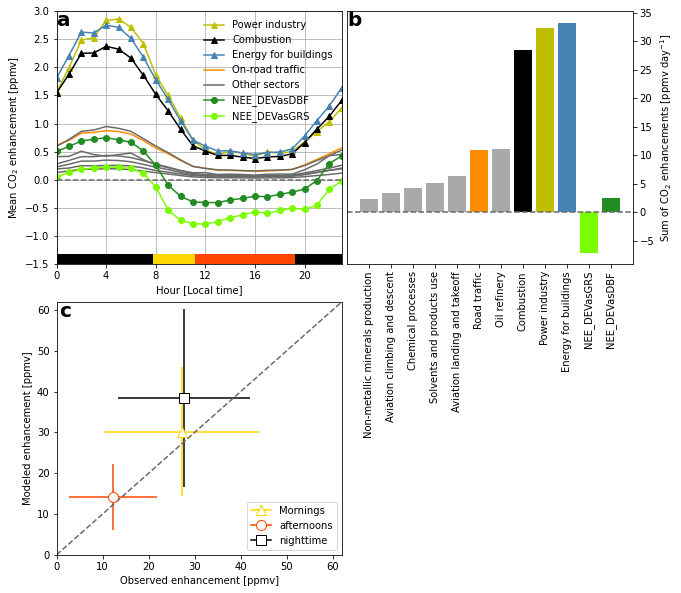

In [49]:
# Figure 4 of the manuscript
#AGS, agricultural soils
#CHE, chemical processes
#ENE, power industry
#FFF, fossil fuel fires
#IND, combustion for manufacturing
#IRO, iron and steel production
#NEU, non energy use of fuels
#NFE, non-ferrous metals production
#NMM, non-metallic minerals production
#PRO, fuel exploitation
#PRU_SOL, solvents and products use
#RCO, energy for buildings
#REF_TRF, oil refineries and transformation industry
#SWD_INC, solid waste incineration
#TNR_Aviation_CDS, aviation climbing and descent
#TNR_Aviation_CRS, aviation cruise
#TNR_Aviation_LTO, aviation landing and takeoff
#TNR_Other, railways, pipelines, off-road transport
#TNR_Ship, shipping
#TRO_noRES, road transportation
labels_sectors=['Agricultural soils','Chemical processes','Power industry','Fossil fuel fires',
                'Combustion','Iron and steel production','Non-energy use of fuels',
                'Non-ferrous metals production','Non-metallic minerals production',
                'Fuel exploitation','Solvents and products use','Energy for buildings','Oil refinery',
                'Solid waste incineration','Aviation climbing and descent','Aviation cruise',
                'Aviation landing and takeoff','Railways, pipelines, off-road transport',
                'Shipping','Road traffic']
Sector_sum = [np.sum(Sector_ave_hr[:,i]) for i in range(0,20)]
# Magnitude based on mean values
# zeros: AGS, FFF, IRO, NEU, NFE, PRO, SWD, TNR_CRS, TNR_Ship, TNR_other [0,3,5,6,7,9,13,15,17,18]
# small: CHE, NMM, PRU, TNR_CDS, REF, TNR_LTO, on-road traffic [1, 8, 10, 12,14, 16,19]
# large: ENE, IND, RCO [2, 4, 11]
FigDir = '/home/dwei/manuscripts/VPRM-sensitivity/fig/'
MarkerSize = 10
Index_Large = [2, 4, 11]
Index_Small = [1, 8, 10, 12,14, 16,19]
Index_zeros = [0,3,5,6,7,9,13,15,17,18]
Sector_sum_nonzero = np.delete(Sector_sum, Index_zeros)
Labels_nonzero = np.delete(np.array(labels_sectors), Index_zeros)
sortedLabels=[x for _, x in sorted(zip(Sector_sum_nonzero,Labels_nonzero))]
sourtedSum = sorted(Sector_sum_nonzero)
sortedLabels.append('NEE_DEVasGRS')
sortedLabels.append('NEE_DEVasDBF')
sourtedSum.append(np.sum(NEE_ave_hr_grs))
sourtedSum.append(np.sum(NEE_ave_hr_dbf))
colors_LargeSec=['y', 'black', 'steelblue']
sortedColors=['darkgray', 'darkgray', 'darkgray', 'darkgray', 'darkgray', 'darkorange','darkgray', 
        'black', 'y', 'steelblue', 'lawngreen', 'forestgreen', ]

fig = plt.figure(figsize=(10, 10))
# Diurnal variations
gs = fig.add_gridspec(2,2)
gs.update(left=0.1, right=0.9, wspace=0.02, hspace=0.15)
ax = fig.add_subplot(gs[0, 0])
ind=0
for i in Index_Large: 
    ax.plot(range(0,24), Sector_ave_hr[:,i], marker='^',label=labels_sectors[i], color=colors_LargeSec[ind])
    ind+=1   
ax.plot(range(0,24), Sector_ave_hr[:,19], color='darkorange', label='On-road traffic')
for i in [1, 8, 10, 12,14]: 
    ax.plot(range(0,24), Sector_ave_hr[:,i], color='dimgrey')
ax.plot(range(0,24), Sector_ave_hr[:,16], color='dimgrey', label='Other sectors')
ax.plot(range(0,24), NEE_ave_hr_dbf, label='NEE_DEVasDBF', color='forestgreen',marker='o')
ax.plot(range(0,24), NEE_ave_hr_grs, label='NEE_DEVasGRS', color='lawngreen',marker='o')  
ax.plot([sr_hr, nn_hr], [-1.5, -1.5], color='gold',linestyle='-',linewidth=20)
ax.plot([nn_hr+1, ss_hr], [-1.5, -1.5], color='orangered',linestyle='-',linewidth=20)
ax.plot([0, sr_hr-1], [-1.5, -1.5], color='k',linestyle='-',linewidth=20)
ax.plot([ss_hr+1, 23], [-1.5, -1.5], color='k',linestyle='-',linewidth=20)
ax.axhline(y=0, color='dimgrey',linestyle='--')
ax.set_ylabel('Mean CO$_{2}$ enhancement [ppmv]')
ax.set_xlabel('Hour [Local time]')
ax.set_xlim(0, 23)
ax.set_xticks(range(0, 23, 4))
ax.set_ylim(-1.5, 3.0)
ax.grid()
leg=ax.legend(loc='upper right',frameon=False)

# The accumulation over the course of the day
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(sortedLabels, sourtedSum, color=sortedColors)
ax2.axhline(y=0, linestyle='--', color='dimgray')
ax2.set_ylabel('Sum of CO$_{2}$ enhancements [ppmv day$^{-1}$]')
ax2.tick_params(axis='x', labelrotation =90)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

# Bar plots for the averages
ax3 = fig.add_subplot(gs[1,0])
# NEE_en = NEE_dbf_en
NEE_en = NEE_grs_en

# AQ for the afternoon values
tstnee = NEE_en[boo_aft2]
tstant = EDGAR_en[boo_aft2]

ax3.errorbar(np.nanmean(OBS_en[boo_mor2]), np.nanmean(NEE_en[boo_mor2]+EDGAR_en[boo_mor2]), 
               xerr=np.nanstd(OBS_en[boo_mor2]),yerr=np.nanstd(NEE_grs_en[boo_mor2]+EDGAR_en[boo_mor2]),
               marker='^', color='gold',label='Mornings',markerfacecolor='w',markersize=MarkerSize)
ax3.errorbar(np.nanmean(OBS_en[boo_aft2]),np.nanmean(tstnee+tstant), 
               xerr=np.nanstd(OBS_en[boo_aft2]),yerr=np.nanstd(NEE_grs_en[boo_aft2]+EDGAR_en[boo_aft2]),
               marker='o', color='orangered',label='afternoons',markerfacecolor='w',markersize=MarkerSize)
ax3.errorbar(np.nanmean(OBS_en[boo_nig2]),np.nanmean(NEE_en[boo_nig2]+EDGAR_en[boo_nig2]),
               xerr=np.nanstd(OBS_en[boo_nig2]),yerr=np.nanstd(NEE_grs_en[boo_nig2]+EDGAR_en[boo_nig2]),
               marker='s',color='k',label='nighttime',markerfacecolor='w',markersize=MarkerSize) 

# ax3.scatter(OBS_en[boo_aft2],NEE_dbf_en[boo_aft2]+EDGAR_en[boo_aft2], marker='o', 
#               color='orangered')
# ax3.scatter(OBS_en[boo_aft2_gs],NEE_dbf_en[boo_aft2_gs]+EDGAR_en[boo_aft2_gs], marker='o', 
#               edgecolor='black')

# # No NEE
# ax3.errorbar(np.nanmean(OBS_en[boo_nig2]),np.nanmean(EDGAR_en[boo_nig2]),
#                xerr=np.nanstd(OBS_en[boo_nig2]),yerr=np.nanstd(EDGAR_en[boo_nig2]),
#                marker='o',color='k') 
# ax3.errorbar(np.nanmean(OBS_en[boo_mor2]),np.nanmean(EDGAR_en[boo_mor2]), 
#                xerr=np.nanstd(OBS_en[boo_mor2]),yerr=np.nanstd(EDGAR_en[boo_mor2]),
#                marker='o', color='gold')
# ax3.errorbar(np.nanmean(OBS_en[boo_aft2]),np.nanmean(EDGAR_en[boo_aft2]), 
#                xerr=np.nanstd(OBS_en[boo_aft2]),yerr=np.nanstd(EDGAR_en[boo_aft2]),
#                marker='o', color='orangered')

ax3.plot([0,100],[0,100], color='dimgrey',linestyle='--')
ax3.set_xlabel('Observed enhancement [ppmv]')
ax3.set_ylabel('Modeled enhancement [ppmv]')
ax3.set_xlim(0, 62)
ax3.set_ylim(0, 62)
ax3.legend(loc='lower right')
# ax[1,0].yaxis.set_label_position("right")
# ax[1,0].yaxis.tick_right()
# ax[1,0].text(3, 55, 'Fraction threshold = '+str(fp_fra_crit), fontsize=12)
# ax[1,0].text(3, 50, 'Total threshold = '+str(fp_tot_crit), fontsize=12)

txtx=0.01
txty=0.94
ax.text( 0, txty, 'a', transform=ax.transAxes, fontsize=20, fontweight='bold')
ax2.text(0, txty, 'b', transform=ax2.transAxes, fontsize=20, fontweight='bold')
ax3.text(txtx, txty,'c', transform=ax3.transAxes, fontsize=20, fontweight='bold')

plt.tight_layout()
fig.savefig(FigDir+'fig4_bio_sector_comparison_all')


In [16]:
# Some quick calculations for the paper
tstnee=NEE_en[boo_aft2]
tstant=EDGAR_en[boo_aft2]
print(tstnee)
print(tstant)

tstnee[0:2]=np.nan
tstant[0:2]=np.nan
print(np.nanmean(tstnee+tstant))

perct = np.divide(tstnee,tstant)*100
np.nanmean(perct)


[-0.04662534 -0.09251265 -5.13724638 -4.68988433 -3.6241658  -1.68562857
 -2.7061975  -3.69985682 -2.91094905 -5.04560971 -5.09615041 -4.43456592
 -3.49089629 -0.79425552 -3.28342066 -2.13632651 -2.73575786 -3.25904404
 -0.11759147  0.0547639  -0.03397171 -3.4513033  -5.05531511 -9.03502223
 -8.94064754 -0.22614915 -2.07107678 -3.25772383 -2.24807531 -3.8431151
 -1.94045656 -1.32859055 -1.1172837  -2.42793294 -1.38359894 -0.82655584
 -1.49386116 -1.57568446 -1.01062891 -1.83606359 -0.91825898 -1.18584015
 -0.2635619 ]
[17.03154157 15.68234492 20.96204071 12.58124192  7.63107733 12.69767614
  6.31363364 10.38894614  5.53689673 10.39931815 28.82727614 15.01318462
 14.08257104  9.33438702  8.03703074  5.60280184  9.31998088 13.19939775
 17.54497823 30.50025819 17.49139061 11.49784846 10.41975512 19.98877707
 41.99767079 12.20854889 13.62322863 13.60773827 24.57792669 19.96148246
 31.73132728 25.16705289 26.29001166 26.09602074 17.56640182 23.52369173
 20.3491752  15.33108423 27.72479443  

-20.34935313370692